In [1]:
from pbfcast.data import Dataset
from pbfcast.persistency import load_model
from pbfcast.evaluate import Forecast
from pbfcast.visualization import plot_prob_forecasts
from pbfcast.evaluate import compute_metrics

In [7]:
model3_dataset = Dataset()
    
val_set = model3_dataset.get_listdataset(
    df = model3_dataset.getSubset(
    months=[12],
    train=False
    ),
)

In [3]:
predictor = load_model('deepAR_pv_e60_cl120_nbc30_lr0.001_xp1')
f = Forecast(predictor=predictor)

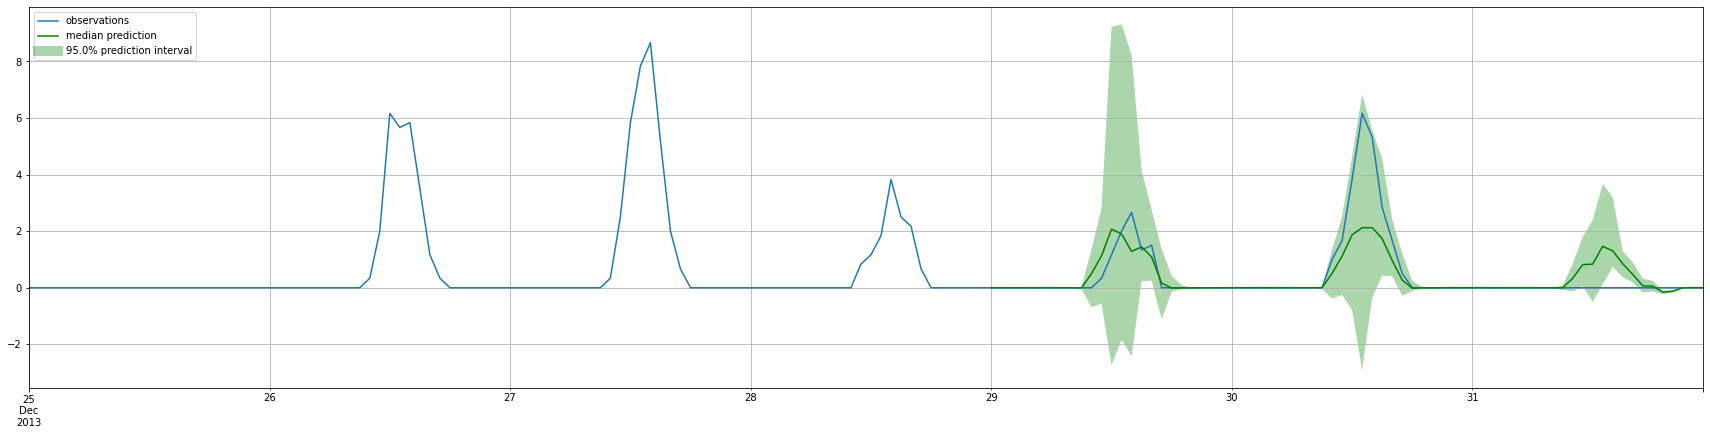

<Figure size 432x288 with 0 Axes>

In [8]:
forecasts, tss = f.evaluate_predictions(val_set)
f_entry, ts_entry = f.get_forecast_entry()
plot_prob_forecasts(ts_entry, f_entry, prediction_length=24*7)

In [9]:
res = compute_metrics(quantiles=[0.9], tss=tss, forecasts=forecasts, num_series=len(val_set))
res

Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


,score
MSE,0.548291
MASE,0.623059
MAPE,0.565562
RMSE,0.740467
NRMSE,1.666051
QuantileLoss[0.9],9.848321
Coverage[0.9],0.902778
AVE[0.9],0.002778
wQuantileLoss[0.9],0.30776


In [6]:
val = model3_dataset.get_hb_set()
val2 = val[val.index.month == 6]

In [8]:
import pandas as pd

pred = pd.DataFrame(index=ts_entry[-7*24:].index)
pred['5%'] = f_entry.quantile(.5)
pred['true'] = val2.ppv[-7*24:].values
pred['95%'] = f_entry.quantile(.95)

pred[:24]

,5%,true,95%
2013-06-24 00:00:00,0.037587,0.000,0.127557
2013-06-24 01:00:00,-0.023737,0.000,0.023509
2013-06-24 02:00:00,-0.038795,0.000,0.016677
2013-06-24 03:00:00,-0.041983,0.000,-0.008874
2013-06-24 04:00:00,-0.051225,0.000,-0.025816
2013-06-24 05:00:00,-0.044089,0.000,-0.010133
2013-06-24 06:00:00,-0.049259,0.000,-0.004325
2013-06-24 07:00:00,-0.040016,0.000,-0.001202
2013-06-24 08:00:00,-0.034065,0.168,0.037332
2013-06-24 09:00:00,0.400814,1.000,0.881416
